In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run ../modules/utils.ipynb

In [13]:
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligossample3-1.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_no_acid_deg_20to40b_70c_component_only.xlsx')
df.shape

(116, 13)

In [14]:
df = thermo_df(df)

In [15]:
df_25k = df[(df.Mass > 2E4) & (df.Mass < 3E4)]
df_25k.shape

(27, 3)

In [16]:
# df_25k.to_excel('~/Downloads/total_tRNA_20to40_no_ad_25k.xlsx')
df_25k.to_excel('~/Downloads/total_tRNA_sample3_no_ad_25k.xlsx')

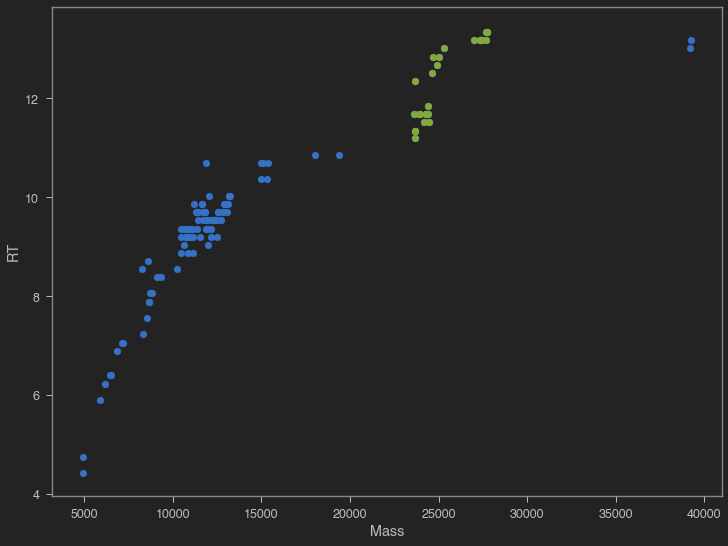

In [6]:
# plot_zones(df, df_25k)
plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df.Mass, df.RT)
plt.scatter(df_25k.Mass, df_25k.RT, color='g')

plt.savefig('/Users/bryan/Downloads/tRNA_full.png')

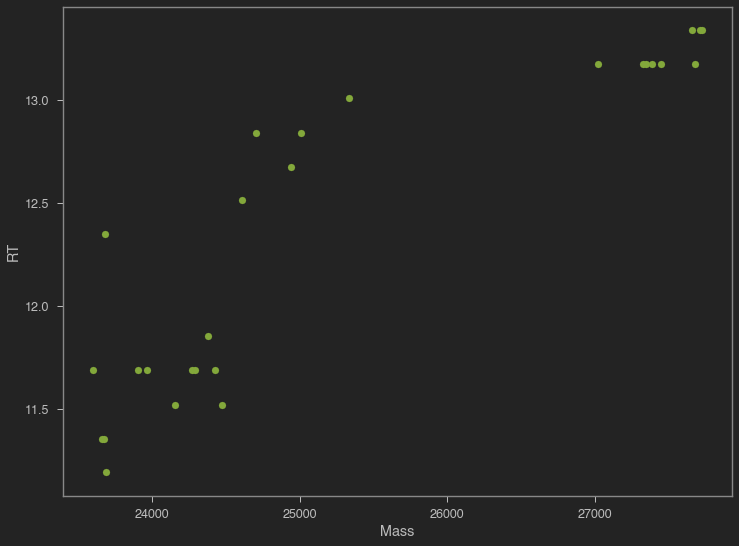

In [7]:
# plot_zone(df_25k)

plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df_25k.Mass, df_25k.RT, color='g')

# plt.savefig('/Users/bryan/Downloads/tRNA_25k.png')

In [190]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_draw = df2[(df2.Mass > 12329) & (df2.Mass < 22000) & (df2.RT < 25) & (df2.RT > 8)]
df_draw = df_25k #df7
# df_draw = df2_top[(df2_top.RT < 25) & (df2_top.RT > 8)]
x = df_draw.Mass
y = df_draw.RT
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '13e3f47…

In [81]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_draw = df2[(df2.Mass > 12329) & (df2.Mass < 22000) & (df2.RT < 25) & (df2.RT > 8)]
df_draw = df_25k #df7
# df_draw = df2_top[(df2_top.RT < 25) & (df2_top.RT > 8)]
x = df_draw.Mass
y = df_draw.Vol
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'f070b1a…

In [8]:
df_25k.sort_values('Mass', ascending=False)

,Mass,RT,Vol
113,27724.702169,13.337008,19057.97
112,27715.723509,13.337008,132733.86
111,27678.803071,13.173246,68897.12
110,27657.742294,13.337008,663069.60
109,27446.590108,13.173246,95403.98
108,27387.688056,13.173246,798060.67
107,27349.743317,13.173246,445790.91
106,27328.746615,13.173246,2680510.20
105,27023.703201,13.173246,222544.01
104,25334.583962,13.009915,169882.50


In [62]:
# 20to40 CCA-tailed
masses = [24625.465389, 24763.495702, 24939.515536, 27657.762268]
vols = [601938.14, 1979656.58, 347778.18, 687400.02]

In [72]:
masses = [24939.512133, 27657.742294, 25334.583962]
vols = [344737.73, 663069.60, 169882.50]

In [ ]:
plt.figure(figsize=(12, 9))
plt.xlabel('Monoisotopic Mass')
plt.ylabel('Sum Intensity')
plt.scatter(df.Mass, df.Vol, color='r')
plt.scatter(masses, vols, color='b')

for mass, vol in zip(masses, vols):
    txt = '{:.2f}'.format(mass)
    plt.annotate(s=txt, size=13, xy=(mass, vol), textcoords="offset points", xytext=(10, -20), ha='center')

# CCA, CC, C matched in NO_acid_degration MFEs

In [174]:
df = pd.read_excel('/Users/bryan/Downloads/total_tRNA_no_acid_deg_2.xlsx')
df.shape

(36, 9)

In [175]:
df = thermo_df(df, key_rows_only=False)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
Unnamed: 0    36 non-null int64
Mass          36 non-null float64
RT            36 non-null float64
Vol           36 non-null float64
CCAmatched    4 non-null float64
CCmatched     7 non-null float64
Cmatched      6 non-null float64
CCmethyl      4 non-null float64
Cmethyl       1 non-null float64
dtypes: float64(8), int64(1)
memory usage: 2.6 KB


In [177]:
df['CCAmatched'] = df['CCAmatched'].map({1: True})
df['CCmatched'] = df['CCmatched'].map({1: True})
df['Cmatched'] = df['Cmatched'].map({1: True})
df['CCmethyl'] = df['CCmethyl'].map({1: True})
df['Cmethyl'] = df['Cmethyl'].map({1: True})

In [178]:
df.fillna(False, inplace=True)

In [179]:
df.head()

,Unnamed: 0,Mass,RT,Vol,CCAmatched,CCmatched,Cmatched,CCmethyl,Cmethyl
0,33,27716.701443,12.409472,52346.70,False,False,False,False,False
1,31,27678.797391,12.217769,73351.39,False,False,False,False,False
2,20,27657.762268,12.217769,687400.02,True,False,False,False,False
3,27,27386.666553,12.217769,281897.18,False,False,False,False,False
4,24,27349.751914,12.217769,480502.19,False,False,False,False,False


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
Unnamed: 0    36 non-null int64
Mass          36 non-null float64
RT            36 non-null float64
Vol           36 non-null float64
CCAmatched    36 non-null bool
CCmatched     36 non-null bool
Cmatched      36 non-null bool
CCmethyl      36 non-null bool
Cmethyl       36 non-null bool
dtypes: bool(5), float64(3), int64(1)
memory usage: 1.4 KB


In [181]:
df_cca = df[df.CCAmatched == True]
df_cc = df[df.CCmatched == True]
df_c = df[df.Cmatched == True]
df_cc_me = df[df.CCmethyl == True]
df_c_me = df[df.Cmethyl == True]

In [182]:
df_union = pd.concat([df_cca, df_cc, df_c])

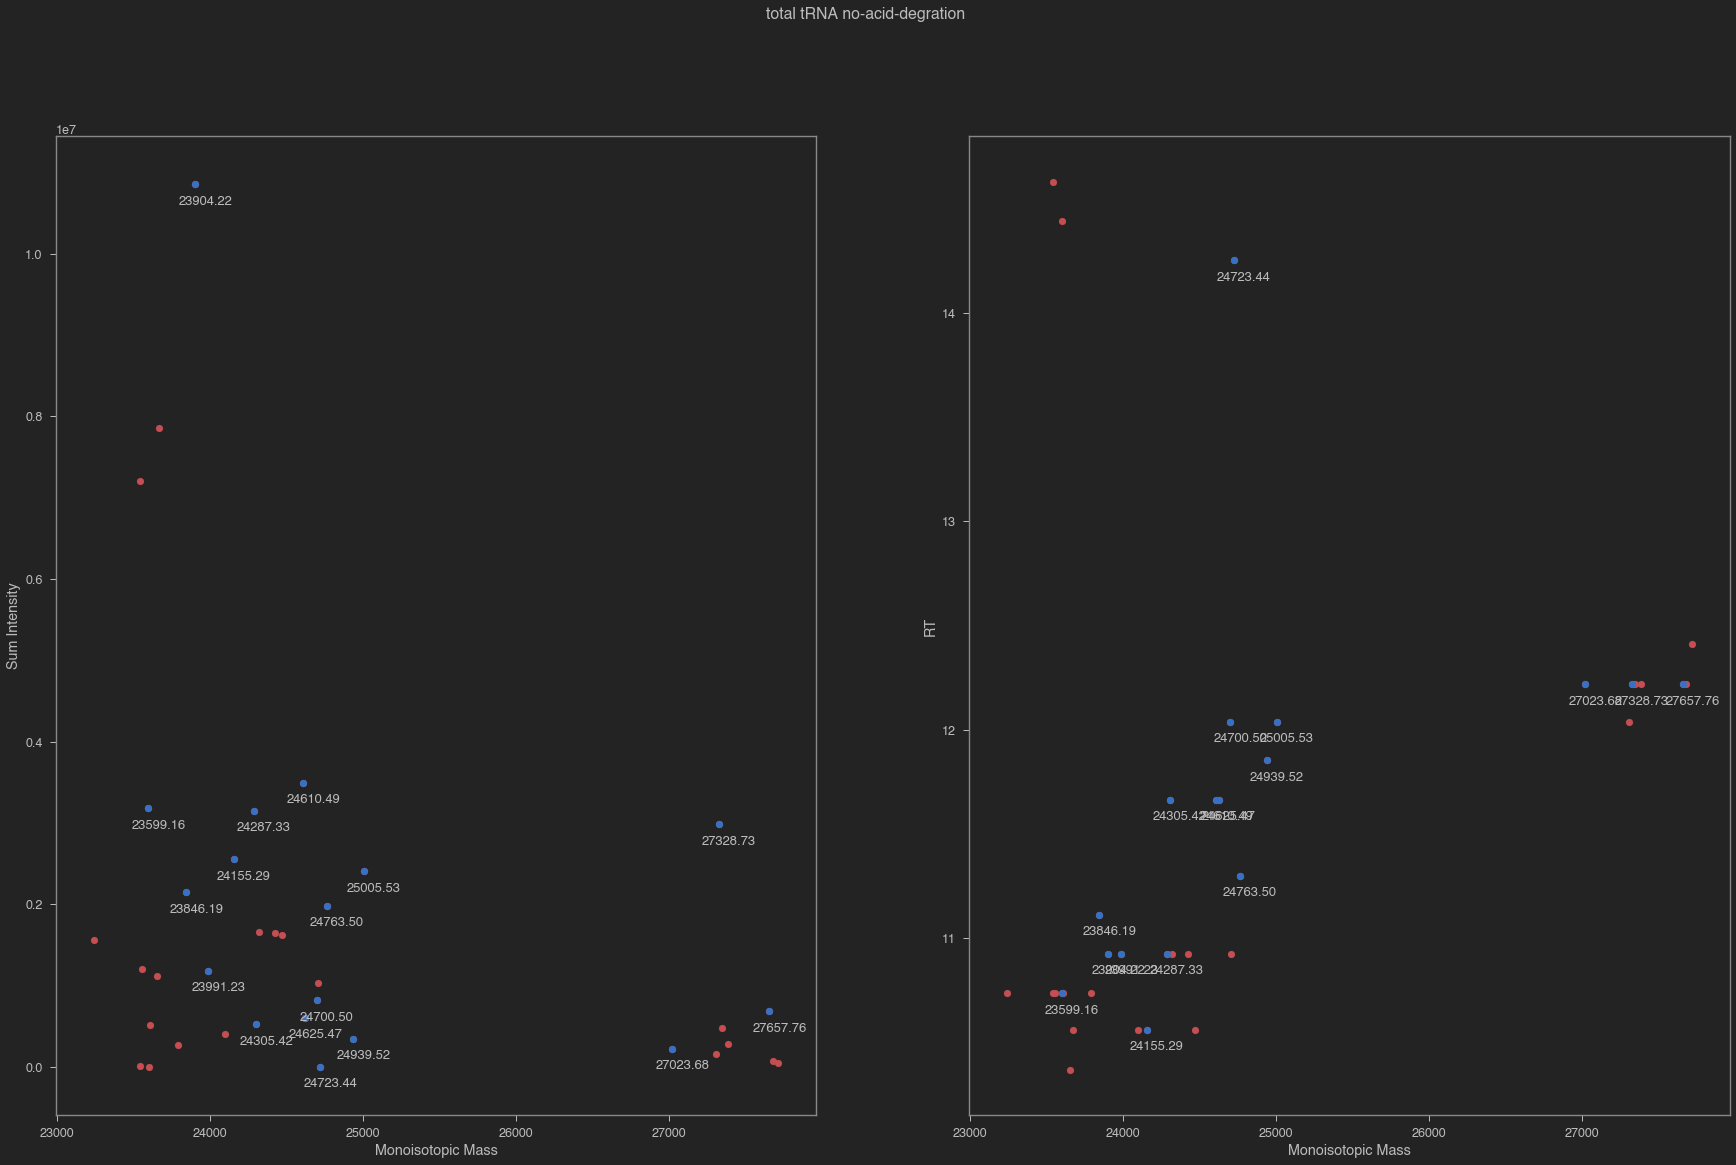

In [189]:
# plt.figure(figsize=(12, 9))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 18), sharex=True)
fig.suptitle('total tRNA no-acid-degration')
#### ax1
# ax1.xlabel('Monoisotopic Mass')
# ax1.ylabel('Sum Intensity')
ax1.set(xlabel='Monoisotopic Mass', ylabel='Sum Intensity')
ax1.scatter(df.Mass, df.Vol, color='r')

ax1.scatter(df_union.Mass, df_union.Vol, color='b')

for idx, row in df_union.iterrows():
    txt = '{:.2f}'.format(row.Mass)
    ax1.annotate(s=txt, size=13, xy=(row.Mass, row.Vol), textcoords="offset points", xytext=(10, -20), ha='center')

#### ax2
# ax1.xlabel('Monoisotopic Mass')
# ax1.ylabel('Sum Intensity')
ax2.set(xlabel='Monoisotopic Mass', ylabel='RT')
ax2.scatter(df.Mass, df.RT, color='r')

# df_union = pd.concat([df_cca, df_cc, df_cc_me])
ax2.scatter(df_union.Mass, df_union.RT, color='b')

for idx, row in df_union.iterrows():
    txt = '{:.2f}'.format(row.Mass)
    ax2.annotate(s=txt, size=13, xy=(row.Mass, row.RT), textcoords="offset points", xytext=(10, -20), ha='center')

In [64]:
# df_25k.to_excel('total_tRNA_no_acid_deg_1.xlsx')